# Import Library 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Data set 

In [2]:
data = pd.read_csv("./dataset/train.csv") # path for data set
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Data Output Distribution 

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64



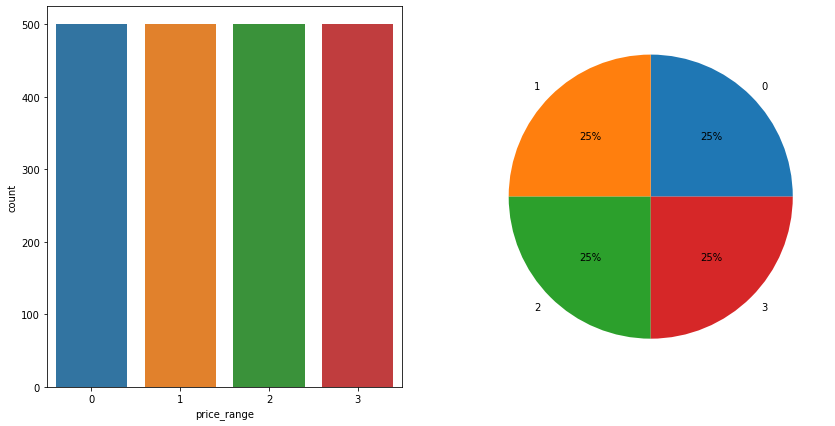

In [3]:
# Class distribution of Output/dependent feature

print( data['price_range'].value_counts() )
print()

plt.figure(figsize= (14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x = 'price_range' , data = data)

plt.subplot(1, 2, 2)
plt.pie(data['price_range'].value_counts() , labels= [i for i in range(data.price_range.nunique()) ], autopct='%.0f%%')

plt.show()


# Data Distribution 

battery_power


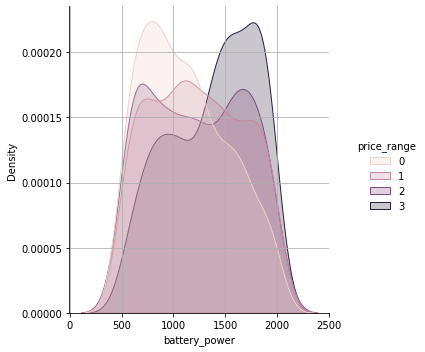

blue


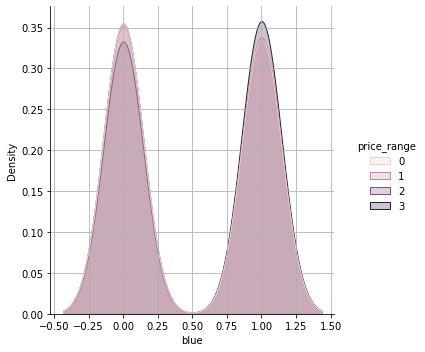

clock_speed


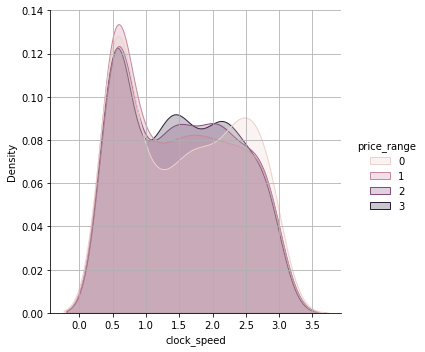

dual_sim


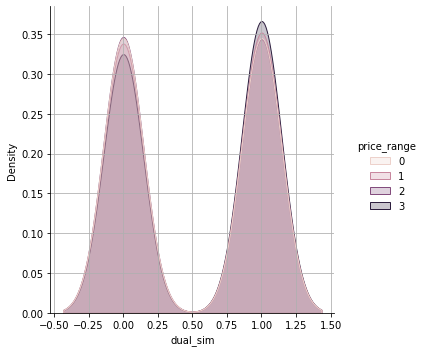

fc


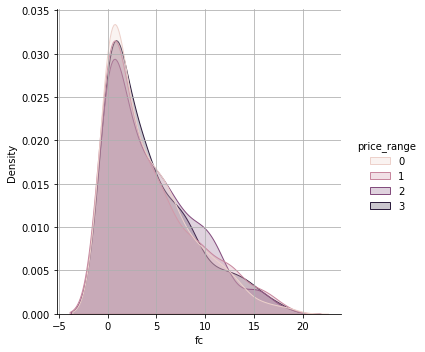

four_g


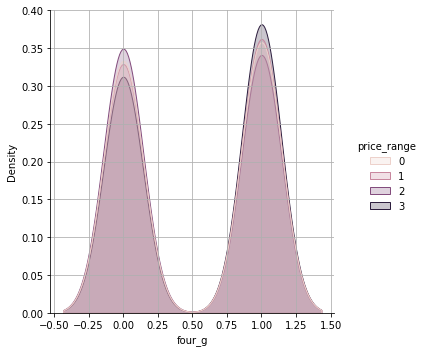

int_memory


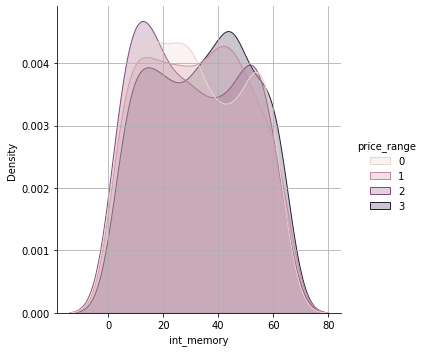

m_dep


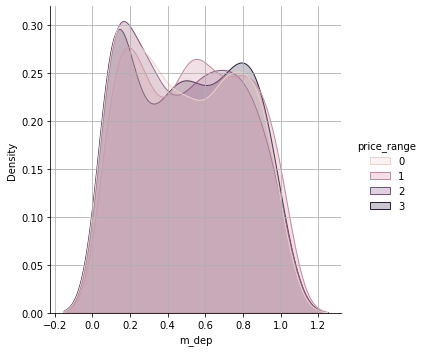

mobile_wt


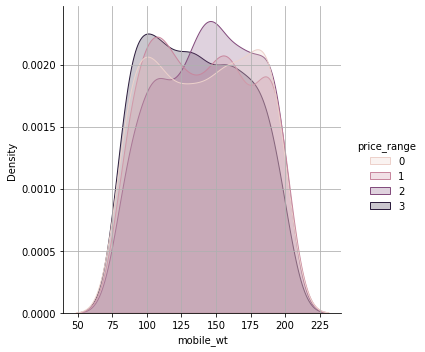

n_cores


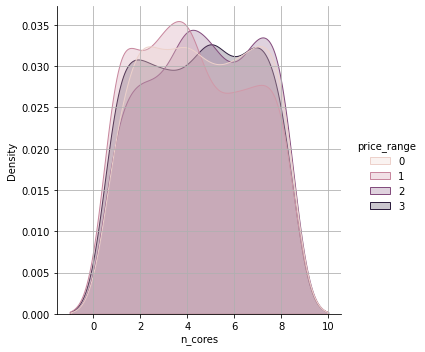

pc


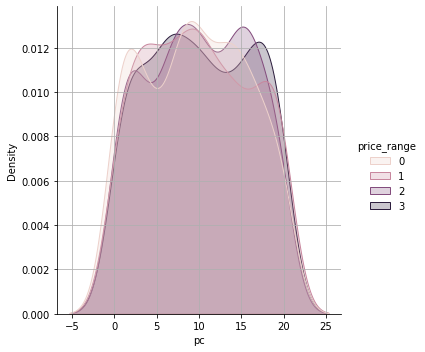

px_height


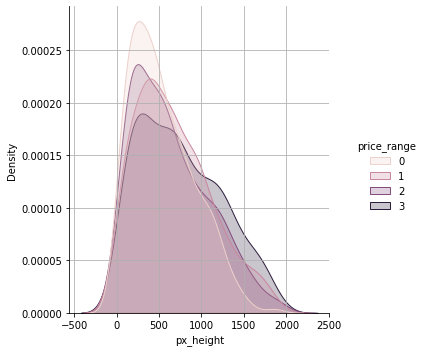

px_width


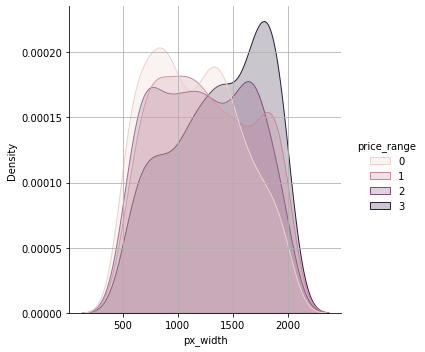

ram


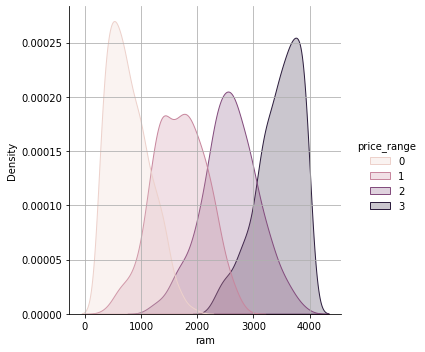

sc_h


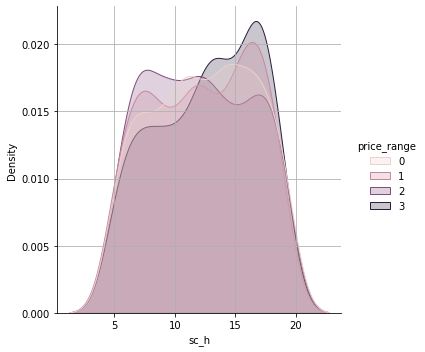

sc_w


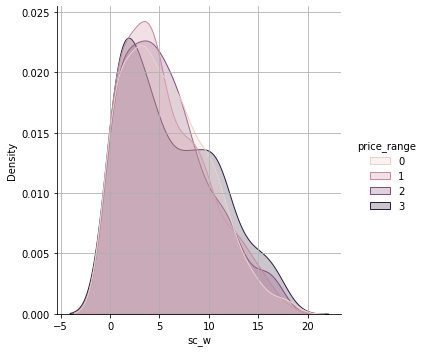

talk_time


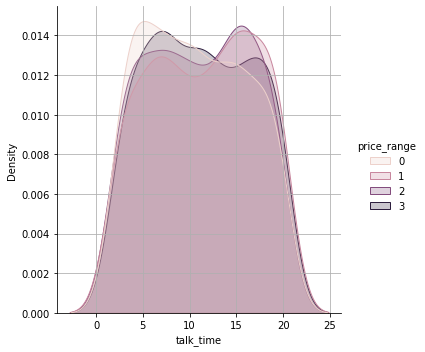

three_g


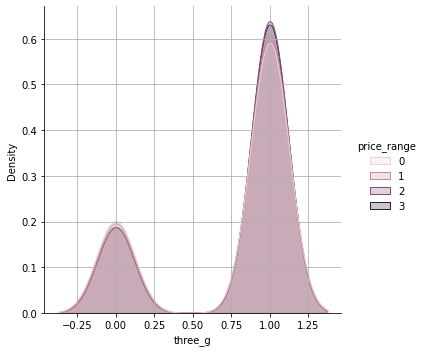

touch_screen


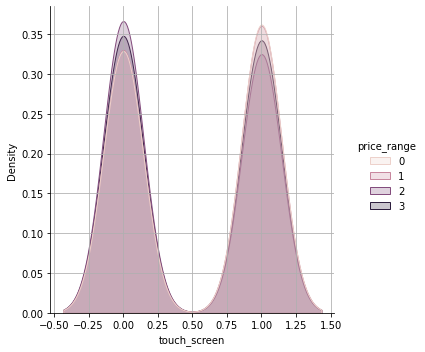

wifi


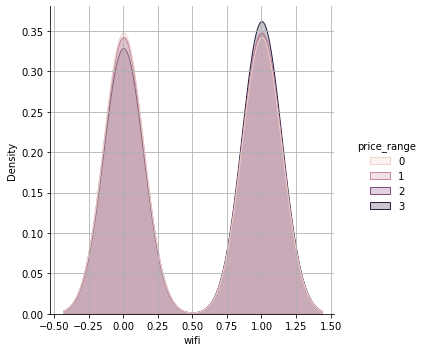

In [4]:
for colm in data.select_dtypes(np.number).columns[:-1]:
    
    print(colm) 
    #sns.displot(data, x = colm,  hue="price_range")
    sns.displot(data, x = colm,  hue="price_range", kind="kde", fill=True)
    plt.grid()
    plt.show()

In [5]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns[:-1]:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

battery_power


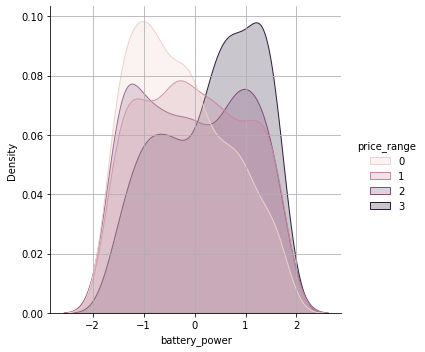

blue


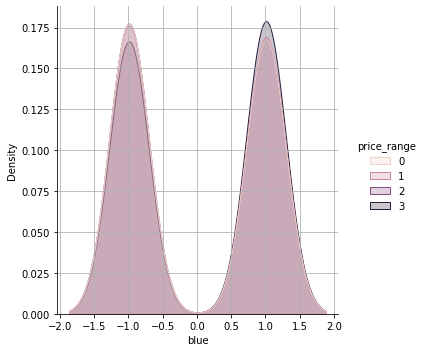

clock_speed


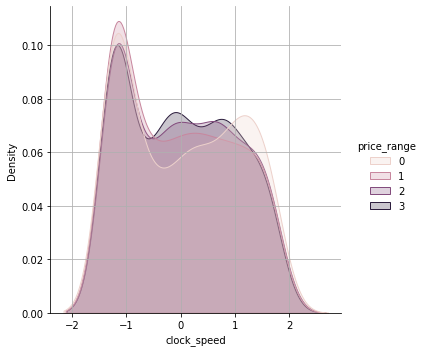

dual_sim


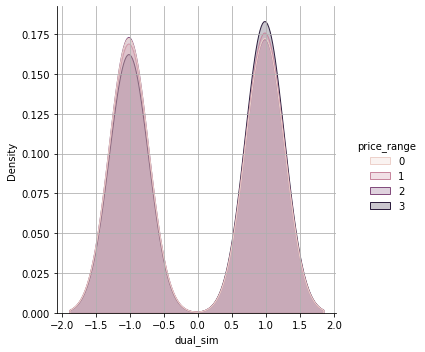

fc


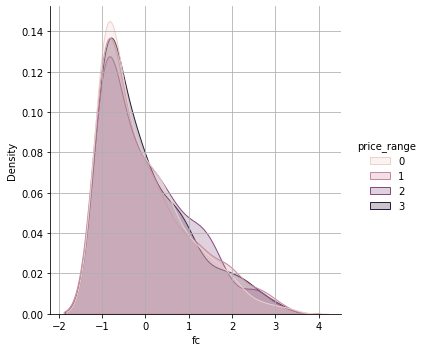

four_g


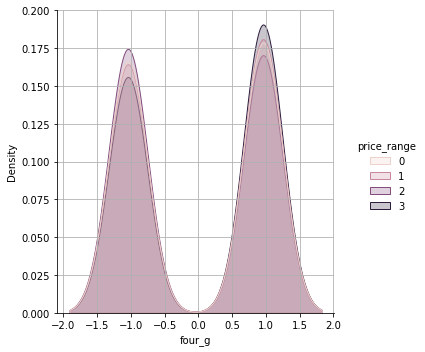

int_memory


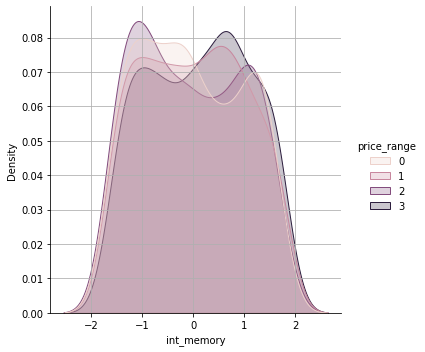

m_dep


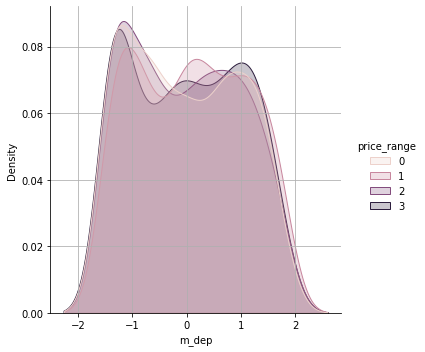

mobile_wt


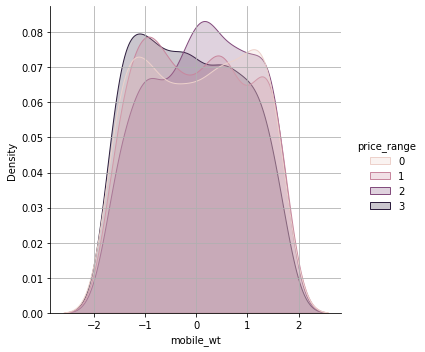

n_cores


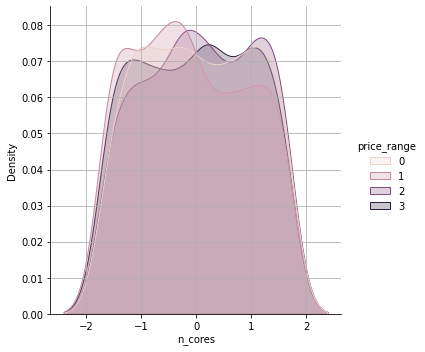

pc


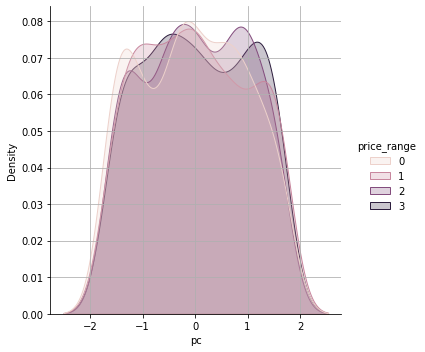

px_height


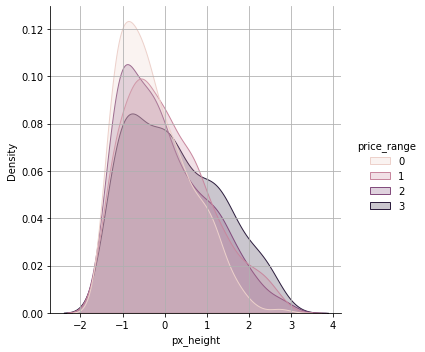

px_width


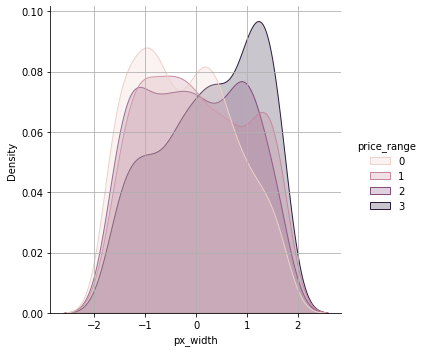

ram


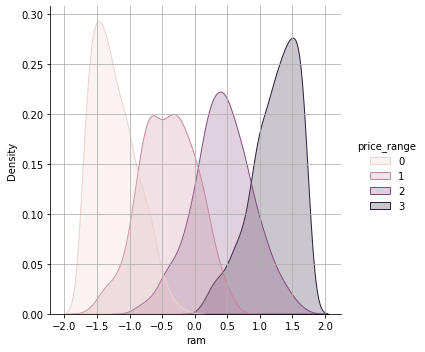

sc_h


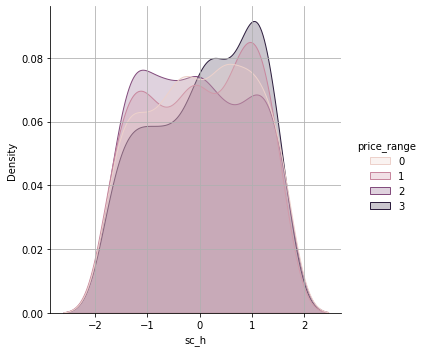

sc_w


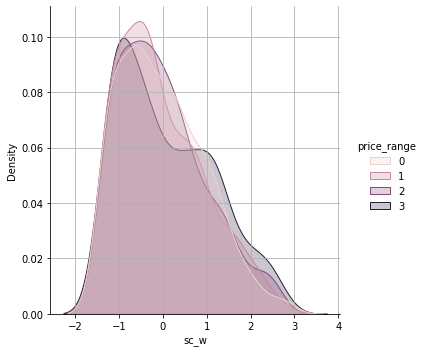

talk_time


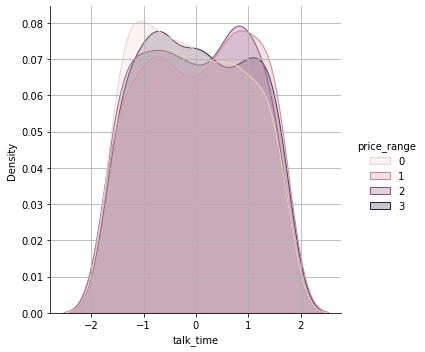

three_g


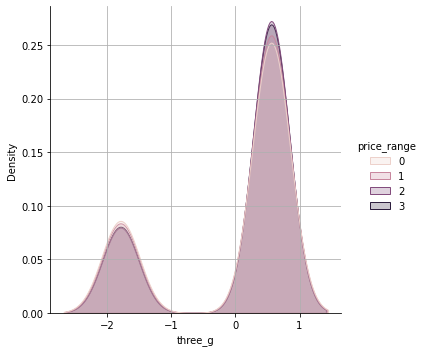

touch_screen


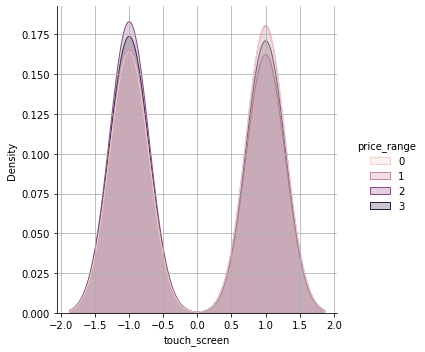

wifi


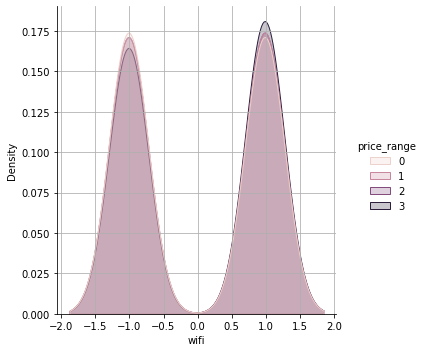

In [6]:
data = z_score(data)

for colm in data.select_dtypes(np.number).columns[:-1]:
    
    print(colm) 
    sns.displot(data, x = colm,  hue="price_range", kind="kde", fill=True)
    plt.grid()
    plt.show()

In [7]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000
mean,2.255973e-16,-1.421085e-17,-1.074696e-16,5.817569e-17,1.776357e-18,5.329071e-17,-9.237056e-17,-1.154632e-16,1.314504e-16,-1.110223e-16,...,1.154632e-16,6.350476e-17,-1.776357e-16,4.085621e-17,-7.327472e-17,1.367795e-16,1.882938e-16,1.421085e-17,-5.684342e-17,1.500000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.118314
min,-1.678398e+00,-9.898020e-01,-1.252751e+00,-1.018929e+00,-9.926421e-01,-1.043705e+00,-1.655845e+00,-1.392955e+00,-1.701966e+00,-1.538790e+00,...,-1.453664e+00,-1.738816e+00,-1.722281e+00,-1.734174e+00,-1.323800e+00,-1.649172e+00,-1.786414e+00,-1.005767e+00,-1.013846e+00,0.000000
25%,-8.801831e-01,-9.898020e-01,-1.007654e+00,-1.018929e+00,-7.623040e-01,-1.043705e+00,-8.843135e-01,-1.046233e+00,-8.827487e-01,-6.646016e-01,...,-8.165247e-01,-8.717399e-01,-8.451055e-01,-7.847870e-01,-8.647053e-01,-9.171012e-01,5.595007e-01,-1.005767e+00,-1.013846e+00,0.750000
50%,-2.848881e-02,-9.898020e-01,-2.726702e-02,9.809318e-01,-3.016278e-01,9.576465e-01,-2.562588e-03,-6.067634e-03,2.121490e-02,-2.275075e-01,...,-1.827659e-01,-1.044772e-02,2.054609e-02,-7.274678e-02,-1.760629e-01,-2.013194e-03,5.595007e-01,9.937694e-01,9.858501e-01,1.500000
75%,8.573416e-01,1.009798e+00,8.305717e-01,9.809318e-01,6.197247e-01,9.576465e-01,8.791883e-01,1.034098e+00,8.404319e-01,1.083775e+00,...,6.808361e-01,8.826585e-01,8.668380e-01,8.766402e-01,7.421269e-01,9.130748e-01,5.595007e-01,9.937694e-01,9.858501e-01,2.250000
max,1.728380e+00,1.009798e+00,1.810959e+00,9.809318e-01,3.383782e+00,9.576465e-01,1.760939e+00,1.727542e+00,1.687898e+00,1.520869e+00,...,2.962931e+00,1.727176e+00,1.727419e+00,1.588680e+00,2.808054e+00,1.645145e+00,5.595007e-01,9.937694e-01,9.858501e-01,3.000000


# Outlier Detection 

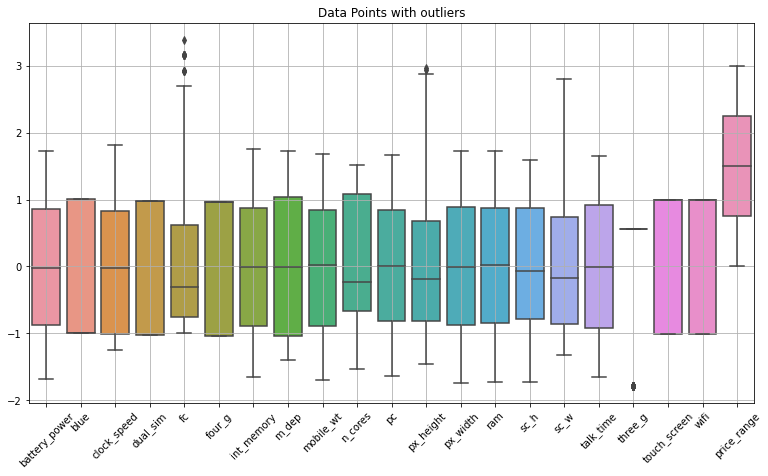

In [8]:
#Using Boxplot to display outliers present in the dataset

plt.figure(figsize=(13,7))
plt.title("Data Points with outliers")


sns.boxplot(data = data)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

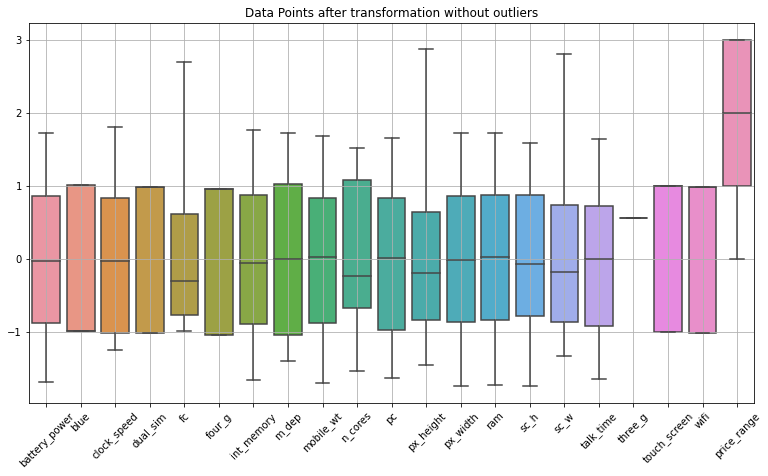

In [9]:
# Find the upper bound and lower bound for every feature 

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
lower_bound = (Q1-1.5*IQR)
upper_bound = (Q3+1.5*IQR)


data = data[~((data < lower_bound) | (data > upper_bound ) ).any(axis = 1)];

#Using Boxplot to display outliers present in the dataset
plt.figure(figsize=(13,7))
plt.title("Data Points after transformation without outliers")
sns.boxplot(data = data)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

# Feature Selection

Feature selection is the technique where we select the relevant feature without transforming our data points

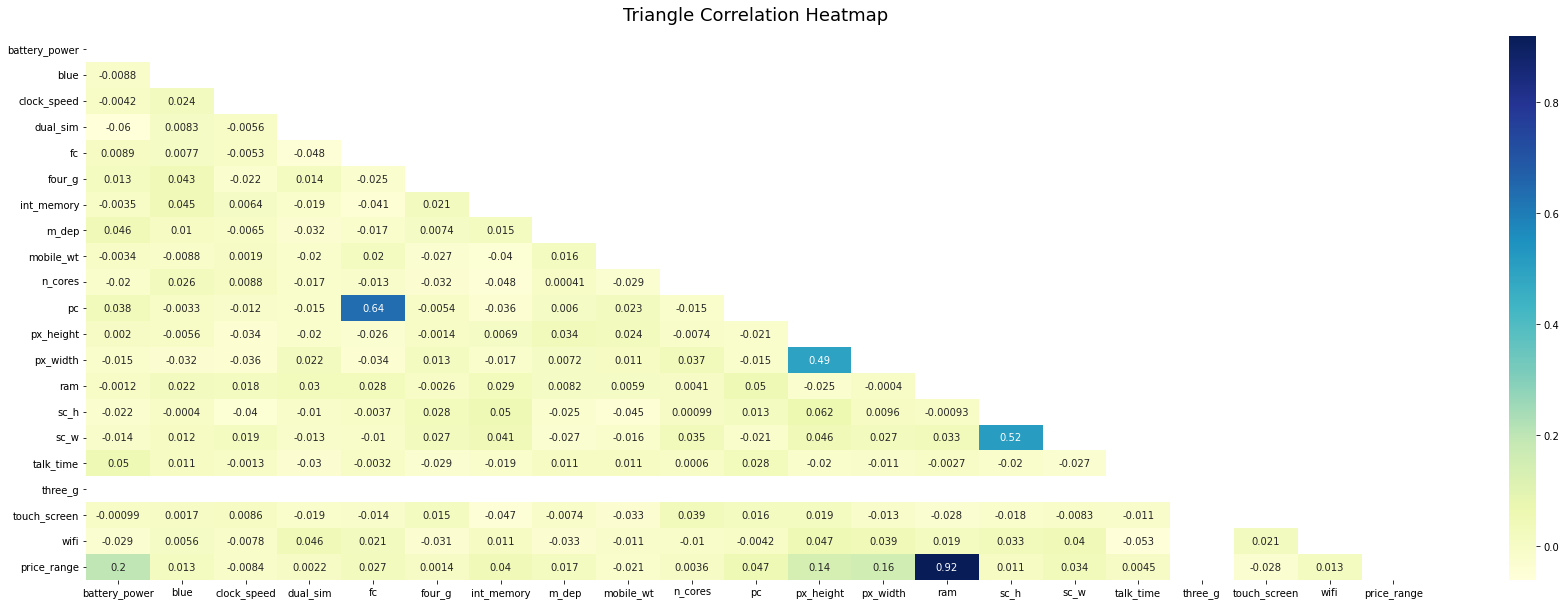

In [10]:
# Corelation Matrix

plt.figure(figsize = (30,10))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, cmap="YlGnBu")

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Here as we see that not many features are displaying ligh level of correlation. we will drop the least correlated features 

In [11]:
# Drop Features 

data.drop(['clock_speed','mobile_wt','three_g','touch_screen'], axis= 1, inplace= True)

# Cross Validation 

In [12]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split( data.iloc[:, :-1].values, 
                                                    data.iloc[:, -1].values, 
                                                    test_size=0.20)

# Convert the data to tensor data set 

In [13]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
from torch.nn import functional as F

In [14]:
# convert the data from the numpy array to tensor

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).long().reshape(-1,1)

X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).long().reshape(-1,1)

In [15]:
# Convert the splitted data of tensors to TensorDataset
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# From the tensordata set to mini batches 
train_data = DataLoader( train_data, 
                        batch_size= int(X_train.shape[0]/10),  # the data set will be devided into n equal mini batches
                       shuffle= True, 
                       drop_last= True)

test_data = DataLoader( test_data, shuffle = True )

# Develop Model

In [16]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        # input layer 
        self.input = nn.Linear(X_train.shape[1], 16)
        
        # dense layer 
        
        self.BN1 = nn.BatchNorm1d(16)
        self.dense1 = nn.Linear(16,32)
        
        self.BN2 = nn.BatchNorm1d(32)
        self.dense2 = nn.Linear(32,64)
        
        self.BN3 = nn.BatchNorm1d(64)
        self.dense3 = nn.Linear(64, 32)
        
        self.BN4 = nn.BatchNorm1d(32)
        self.dense4 = nn.Linear(32, 16)
        
        # Output Layer 
        self.output = nn.Linear(16, 4)
        
    def forward(self, x):
        
        x = F.leaky_relu( self.input(x) )
        
        x = self.BN1(x)
        x = F.leaky_relu(self.dense1(x))
        x = F.dropout(x, p = 0.2 , training= self.training )
        
        x = self.BN2(x)
        x = F.leaky_relu(self.dense2(x))
        x = F.dropout(x, p = 0.3 , training= self.training )
        
        x = self.BN3(x)
        x = F.leaky_relu(self.dense3(x))
        x = F.dropout(x, p = 0.2 , training= self.training )
        
        x = self.BN4(x)
        x = F.leaky_relu(self.dense4(x))
        x = F.dropout(x, p = 0.6 , training= self.training )
        
        x = self.output(x)
        return x

In [21]:
# create a instance of a class
model = Classifier()

# loss function 
loss_fun = nn.CrossEntropyLoss()


# optimizer 
optimizer = torch.optim.Adam(model.parameters() , lr= 0.001, weight_decay= 0.01)  

In [22]:
def model_train_and_validation(model, epoch):
    
    train_acc = []
    test_acc = []
    
    train_loss = []
    test_loss = []
    # loop over every epoch
    for epochi in range(epoch):
        
        # loop over traing data batches
        bach_acc = []
        bach_loss = []
        for x,y in train_data: 
            
            # forward propogation
            yHat = model(x) 
            
            # loss 
            loss = loss_fun(yHat, torch.squeeze(y) )
            bach_loss.append(loss.detach().numpy())
            
            
            # back propogation 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            # compute batch accuracy 
            bach_acc.append( accuracy_score(torch.argmax( yHat,dim =1) ,y) )
            
            
        # compute training accuracy and loss
        train_acc.append(np.mean(bach_acc))
        train_loss.append( np.mean(bach_loss) )
        
        # evaluation mode on
        model.eval()
        
        """
        x,y = next(iter( test_data ) )
        yHat = F.softmax(model(x), dim =1)
        """
        test_acc.append( accuracy_score( torch.argmax(  F.softmax( model(X_test)), dim =1), y_test) )
        test_loss.append( loss_fun( model(X_test), torch.squeeze(y_test) ).detach().numpy() )
        # model back to train mode
        model.train()
        
        print(f" Epoch : {epochi}, Train Acc : {train_acc[epochi]}, Train Loss : {train_loss[epochi]} ")
        
    model.eval()  
    return train_acc, train_loss, test_acc, test_loss


In [23]:
train_acc, train_loss, test_acc, test_loss = model_train_and_validation(model, 500)

 Epoch : 0, Train Acc : 0.2425, Train Loss : 1.4317446947097778 
 Epoch : 1, Train Acc : 0.24916666666666668, Train Loss : 1.411940574645996 
 Epoch : 2, Train Acc : 0.27666666666666667, Train Loss : 1.377301573753357 
 Epoch : 3, Train Acc : 0.32083333333333336, Train Loss : 1.3644801378250122 
 Epoch : 4, Train Acc : 0.30499999999999994, Train Loss : 1.3559701442718506 
 Epoch : 5, Train Acc : 0.3416666666666667, Train Loss : 1.343775749206543 
 Epoch : 6, Train Acc : 0.37083333333333335, Train Loss : 1.2883281707763672 
 Epoch : 7, Train Acc : 0.385, Train Loss : 1.2744011878967285 
 Epoch : 8, Train Acc : 0.4149999999999999, Train Loss : 1.2362897396087646 
 Epoch : 9, Train Acc : 0.45499999999999996, Train Loss : 1.174083948135376 
 Epoch : 10, Train Acc : 0.47833333333333333, Train Loss : 1.121833086013794 
 Epoch : 11, Train Acc : 0.5325, Train Loss : 1.054434895515442 
 Epoch : 12, Train Acc : 0.5683333333333334, Train Loss : 1.0063118934631348 
 Epoch : 13, Train Acc : 0.58250

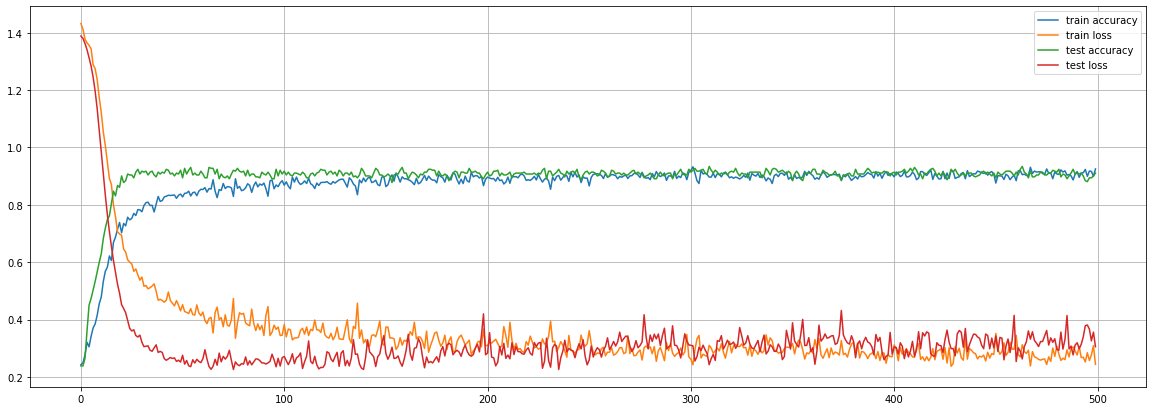

In [24]:
plt.figure(figsize= (20,7))

plt.plot(train_acc, label = "train accuracy")
plt.plot( train_loss, label = "train loss" )
plt.plot( test_acc, label = "test accuracy" )
plt.plot( test_loss, label = "test loss" )
plt.legend()
plt.grid()
plt.show()